# Enoncé

## Structure du projet

Dans le dossier Datasets, vous avez plusieurs bases de données à votre disposition. 

    Choisissez un dataset qui vous intéresse
   
    Prenez le temps de l’analyser et de le comprendre 

    Faites une analyse descriptive de ce dernier 

    Cette analyse devra comporter une partie de visualisation exploratoire

## Livrable

A la fin de l’exercice, vous devrez rendre un projet Ipython et vos graphiques devront être mis dans un PowerPoint (ou équivalent). 



# Initialisation et nettoyage des données

In [1]:
%%time
import pandas as pd
import numpy as np
import seaborn as sbs

Wall time: 908 ms


In [2]:
vg=pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")

In [3]:
vg.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
vg.count()

Name               16717
Platform           16719
Year_of_Release    16450
Genre              16717
Publisher          16665
NA_Sales           16719
EU_Sales           16719
JP_Sales           16719
Other_Sales        16719
Global_Sales       16719
Critic_Score        8137
Critic_Count        8137
User_Score         10015
User_Count          7590
Developer          10096
Rating              9950
dtype: int64

In [5]:
vg.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

In [6]:
vg.User_Score.describe()

count     10015
unique       96
top         tbd
freq       2425
Name: User_Score, dtype: object

Les User_Scores en attente de notations sont notées "tbd", nous devons les noter en "NaN" pour pouvoir convertir User_Score en float64

In [7]:
vg.User_Score=pd.to_numeric(vg.User_Score.replace(to_replace=["tbd"], value=np.nan))

In [8]:
vg.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
dtype: object

Le jeu de donnée est maintenant propre et prêt à lancer.

# Statistiques descriptives

In [9]:
vg.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,7.125046,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,1.500006,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


Quelles conclusions en tirer?
- 16719 jeux vidéos analysés, dont 16450 pour lesquels nous avons un Year_of_release, 8137 pour lesquels nous avons un score "critique" et 7590 pour lesquels nous avons un score "User"
- 75% des jeux sont sortis après 2003, l'année moyenne de sortie est 2006,5 et la médiane est en 2007
- On trouve des valeurs étranges pour les Sales: la médiane est à 0,02 alors que le maximum est à 28,9, trop de jeu pour lesquels nous n'avons pas de vente. En réalité, le minimum de Global Sales est à 0,01 donc non nul, effectivement, une grande partie des jeux ne se vendent pas DU TOUT.
- Au niveau des scores Critiques on trouve des scores entre 0 et 100 (13 étant le minimum) avec une médiane à 71/100
- Au niveau des scores User on trouve des scores entre 1 et 10

In [10]:
import matplotlib.pyplot as plt

C:\Users\Aziz\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


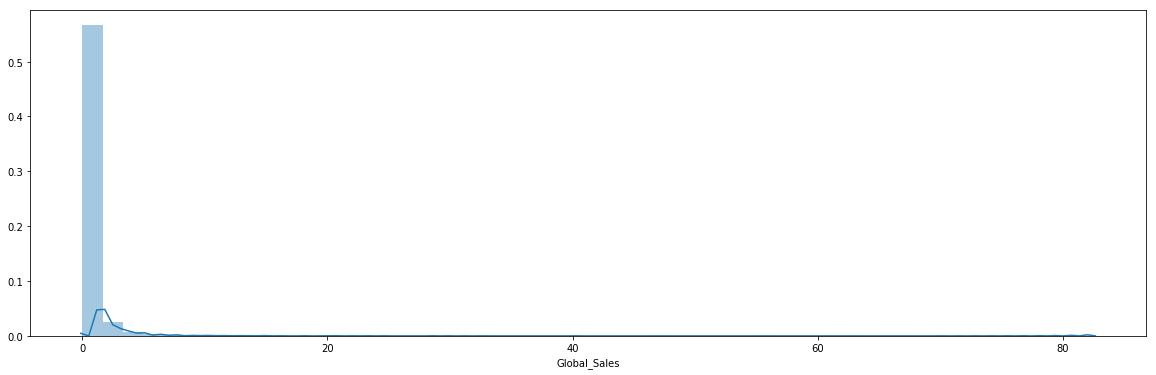

In [11]:
f, ax= plt.subplots(figsize=(20,6))
sbs.distplot(vg.Global_Sales)

## Effectivement, une courbe extrèmement left skimmed, la quasi-totalité des jeux ne se vendent pas

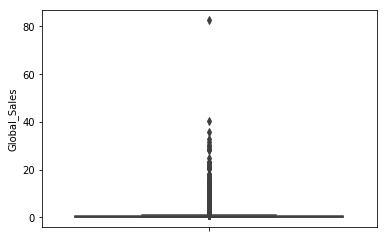

In [12]:
sbs.boxplot(y=vg.Global_Sales)

## Impossible à analyser sous cette forme, le jeu de données est trop concentré autour de 0

In [13]:
vg2=vg.query("Global_Sales>0.50")

In [14]:
vg2.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,3885.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,2553.000000,2553.000000,2583.000000,2583.000000
mean,2005.289060,0.876261,0.511588,0.228372,0.165883,1.782035,76.450450,37.291814,7.431940,320.955478
std,6.795308,1.514181,0.944287,0.598933,0.358490,2.843332,11.745138,22.461283,1.298061,848.961747
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.510000,20.000000,4.000000,0.000000,4.000000
25%,2002.000000,0.310000,0.130000,0.000000,0.040000,0.690000,70.000000,19.000000,6.800000,23.000000
50%,2007.000000,0.520000,0.280000,0.000000,0.080000,1.050000,78.000000,33.000000,7.700000,62.000000
75%,2010.000000,0.940000,0.540000,0.170000,0.170000,1.770000,85.000000,53.000000,8.400000,206.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.600000,10665.000000


## Rééssayons

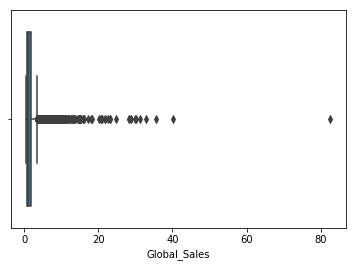

In [15]:
sbs.boxplot(x=vg2.Global_Sales)

## Corrélation Score critique et User

In [16]:
vg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         7590 non-null float64
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


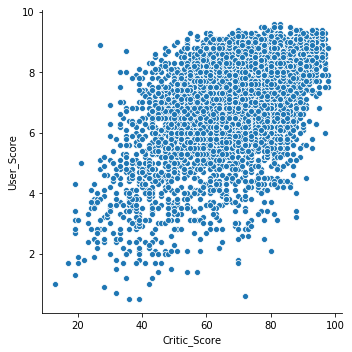

In [17]:
sbs.relplot(x="Critic_Score",y="User_Score",data=vg)

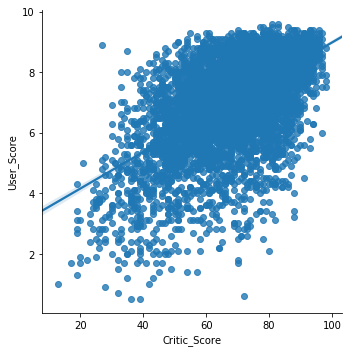

In [18]:
sbs.lmplot(x="Critic_Score",y="User_Score",data=vg)

In [19]:
vgcorr=vg.corr()

In [20]:
vgcorr

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
Year_of_Release,1.000000,-0.092562,0.003842,-0.168386,0.037700,-0.076433,0.011411,0.223407,-0.267851,0.175339
NA_Sales,-0.092562,1.000000,0.765336,0.449598,0.638654,0.941010,0.240755,0.295413,0.086200,0.246429
EU_Sales,0.003842,0.765336,1.000000,0.435068,0.722796,0.901239,0.220752,0.277533,0.055337,0.283360
JP_Sales,-0.168386,0.449598,0.435068,1.000000,0.291096,0.612300,0.152593,0.180219,0.125598,0.075638
Other_Sales,0.037700,0.638654,0.722796,0.291096,1.000000,0.749242,0.198554,0.251639,0.057119,0.238982
Global_Sales,-0.076433,0.941010,0.901239,0.612300,0.749242,1.000000,0.245471,0.303571,0.088139,0.265012
Critic_Score,0.011411,0.240755,0.220752,0.152593,0.198554,0.245471,1.000000,0.425504,0.580878,0.264376
Critic_Count,0.223407,0.295413,0.277533,0.180219,0.251639,0.303571,0.425504,1.000000,0.194133,0.362334
User_Score,-0.267851,0.086200,0.055337,0.125598,0.057119,0.088139,0.580878,0.194133,1.000000,0.027044
User_Count,0.175339,0.246429,0.283360,0.075638,0.238982,0.265012,0.264376,0.362334,0.027044,1.000000


## Le coeff de corrélation de user et critic score est de 0.58

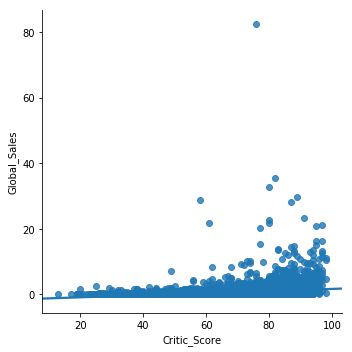

In [21]:
sbs.lmplot(x="Critic_Score",y="Global_Sales",data=vg)

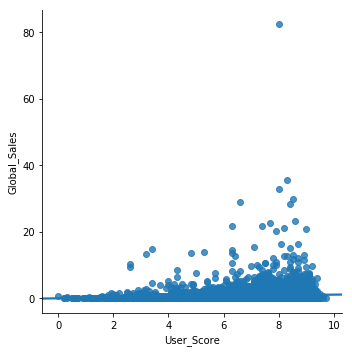

In [22]:
sbs.lmplot(x="User_Score",y="Global_Sales",data=vg)

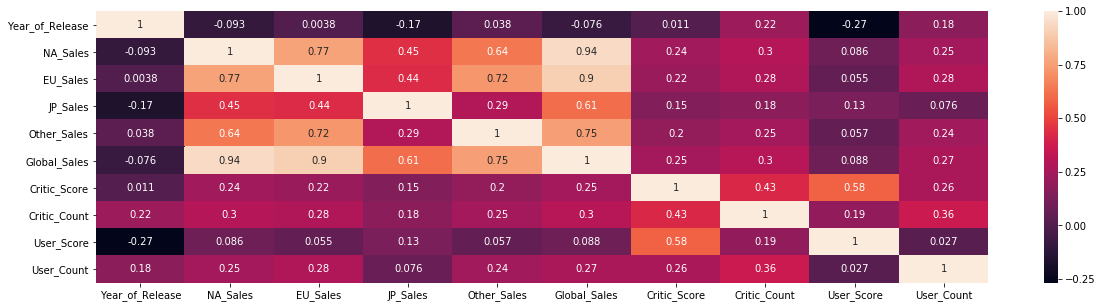

In [23]:
f, ax=plt.subplots(figsize=(20,5))
sbs.heatmap(vgcorr,annot=True, ax=ax)

## Les valeurs les plus corrélées avec Global Sales sont les autres Sales (logique), le critic Score n'est pas très important, le User_score ne l'est pratiquement pas.
## Le critic_count et le user_count sont plus corrélés que le score, un mauvais jeu qui fait le buzz a donc plus de chances de se vendre qu'un bon jeu qui ne le fait pas.
## Analysons maintenant la catégorie des jeux qui se vendent le mieux.

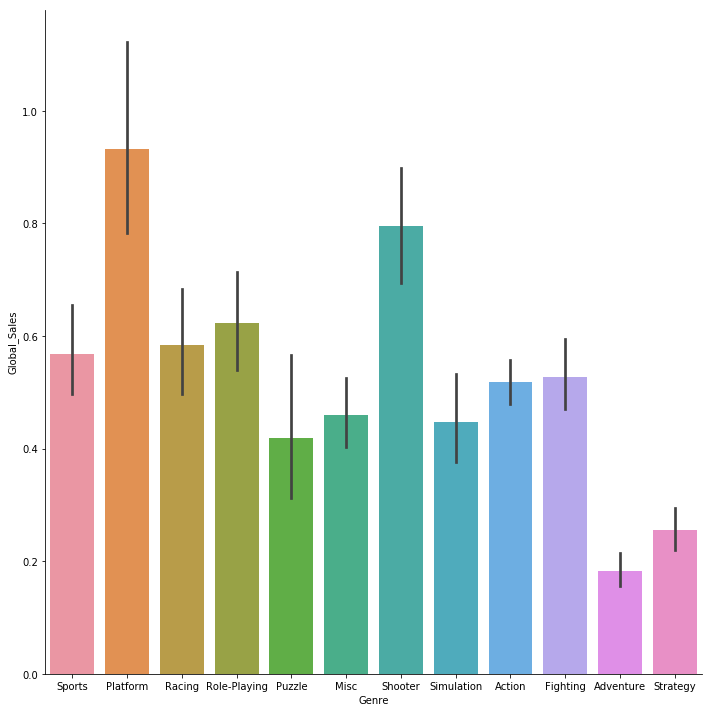

In [24]:

sbs.catplot(y="Global_Sales",x="Genre",kind="bar",height=10,data=vg)
plt.savefig("Sales par genre")

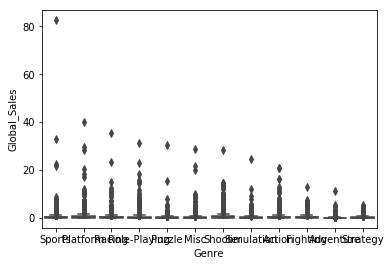

In [25]:
sbs.boxplot(x="Genre",y="Global_Sales",data=vg)

## En moyenne, la variable "Global Sales" est inférieure à 1. Pour être pertinent, il nous faut analyser le 1% de jeux qui se vendent le mieux.

In [26]:
vg.Global_Sales.quantile(0.99)

5.458199999999997

In [27]:
vg2=vg.query("Global_Sales > 5.45")

In [28]:
vg2.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,120.000000,120.000000,120.000000,120.000000
mean,2005.333333,5.369345,3.333036,1.520417,1.024167,11.246905,86.658333,55.858333,7.700000,1358.741667
std,7.393691,4.990402,2.966532,1.806232,1.269164,8.644843,9.183009,25.908467,1.389456,1588.382119
min,1982.000000,0.080000,0.000000,0.000000,0.000000,5.460000,49.000000,8.000000,2.600000,16.000000
25%,2001.000000,2.907500,1.850000,0.125000,0.450000,6.485000,82.750000,37.000000,7.300000,217.250000
50%,2007.000000,3.985000,2.575000,0.850000,0.740000,8.060000,88.000000,57.500000,8.050000,891.000000
75%,2011.000000,6.037500,3.862500,2.500000,1.130000,12.615000,94.000000,77.000000,8.625000,2052.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,105.000000,9.400000,8713.000000


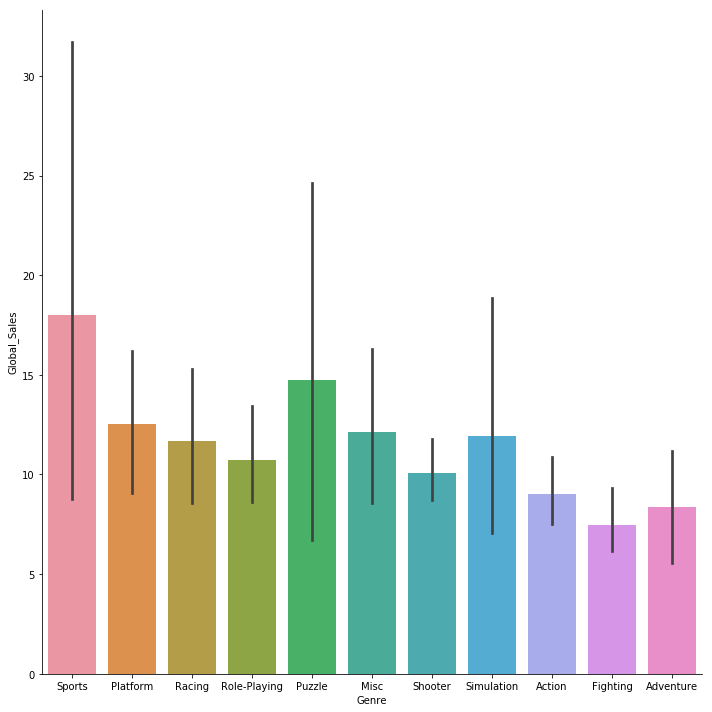

In [29]:
sbs.catplot(y="Global_Sales",x="Genre",kind="bar",height=10,data=vg2)
plt.savefig("Sales par genre top jeux")

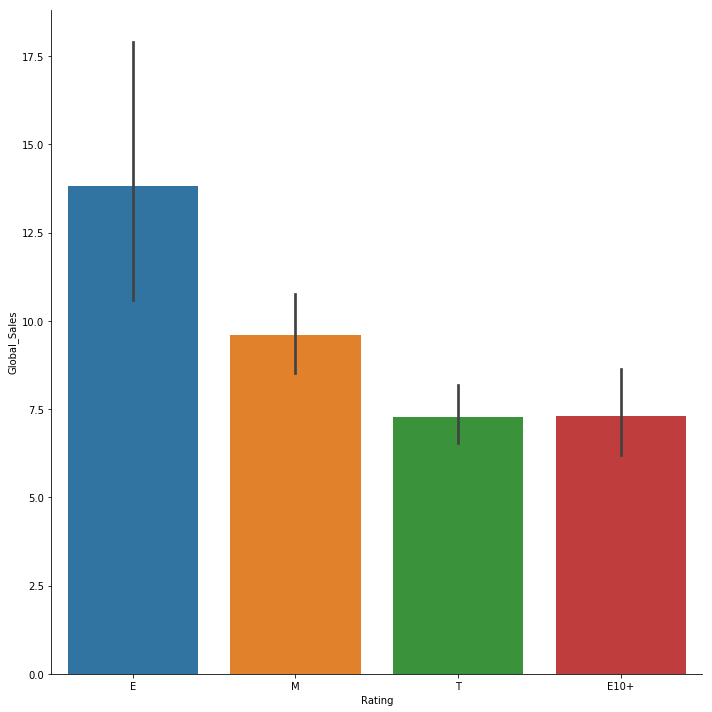

In [30]:
sbs.catplot(y="Global_Sales",x="Rating",kind="bar",height=10,data=vg2)
plt.savefig("Sales par genre top jeux")

## Maintenant que nous avons comparé les moyennes de ventes, comparons le genre de jeu qui se vendent le mieux dans l'absolu (somme des ventes)

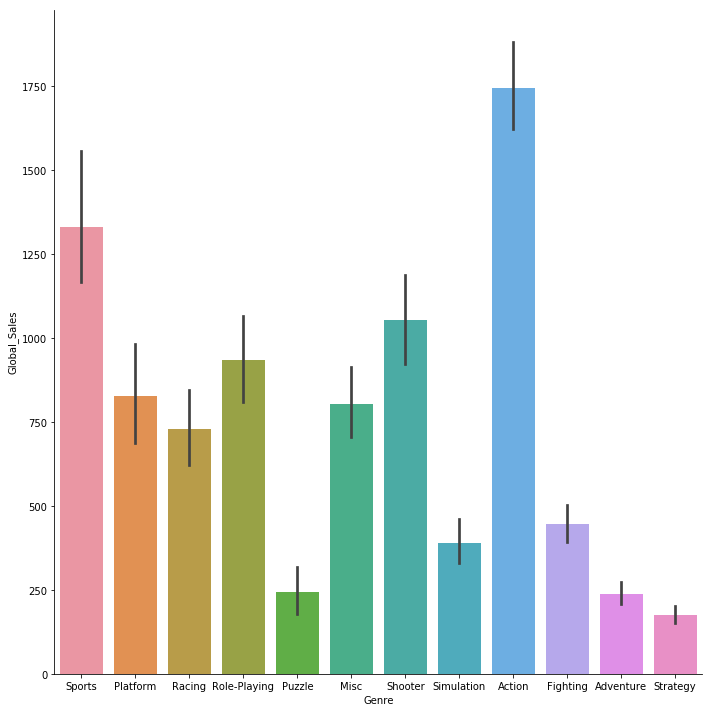

In [31]:

sbs.catplot(y="Global_Sales",x="Genre",kind="bar",height=10,data=vg, estimator=sum)
plt.savefig("Sales par genre")

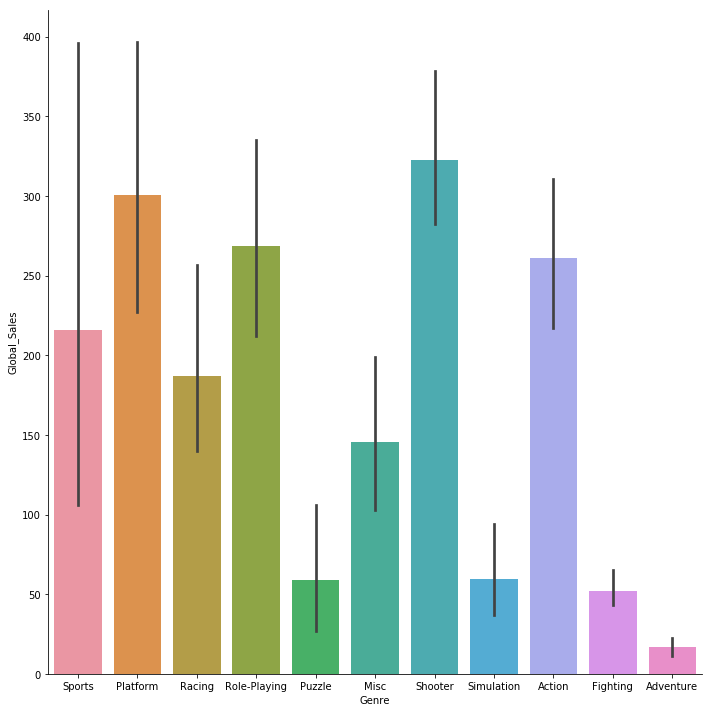

In [32]:

sbs.catplot(y="Global_Sales",x="Genre",kind="bar",height=10,data=vg2, estimator=sum)
plt.savefig("Sales par genre")